# Binary Expression Tree Encoding

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

In [3]:
operators = ['+', '*']
kernel_families = ['A', 'B', 'C']
D = 3

In [4]:
def generate_rand_kernel(T, dims):
    ''' Generate random kernel with T terms
    '''
    
    ops = np.random.choice(operators, size=(T - 1))
    kern_fams = np.random.choice(kernel_families, size=T)
    kern_dims = np.random.randint(1, dims + 1, size=T)
    kernels = ['_'.join((fam, str(dim))) for (fam, dim) in zip(kern_fams, kern_dims)]
    kernel = ' '.join([k + ' ' + op for k, op in zip(kernels, ops.tolist() + [''])])
    return kernel.strip()

rand_kernel = generate_rand_kernel(T=5, dims=D)
rand_kernel

'A_2 * C_1 * B_2 * A_3 + C_1'

## Define Binary Tree
http://interactivepython.org/courselib/static/pythonds/Trees/ParseTree.html

http://openbookproject.net/thinkcs/python/english3e/trees.html

In [10]:
class TreeNode():
    def __init__(self, value, parent=None):
        self.value = value
        self.parent = parent
        self.children = []
    
    def children():
        return self.children
    
    def get_parent():
        return self.parent()
    
    def get_child_count():
        return len(self.children)
    
    def __str__(self):
        return str(self.value)

class BinaryTreeNode(TreeNode):
    
    def __init__(self, value, parent=None):
        super().__init__(value, parent)
        
        self.left = None
        self.right = None
        
    def add_left(self, val):
        self.left = BinaryTreeNode(val, self)
        return self.left
    
    def add_right(self, val):
        self.right = BinaryTreeNode(val, self)
        return self.right
    
    def __str__(self):
        return str(self.value)

class BinaryTree():
    
    def __init__(self):
        self.root = None
    
        
# TODO: 
# define a function to tokenize/parse infix expressions 
# think about where to put graphviz integration
# make Binary Expression Tree class
# make general Node class
# add inorder/postorder
# start thinking about mutation and crossover

## Construct simple example
1. Assume Full expression of infix expression of kernel objects
2. Parse into postfix expressions
 1. Tokenize
3. Create binary expression tree from postfix expression

In [11]:
# input infix string 
infix_expression = 'A1 + B3 + C2 * ( A1 * B2 )'
infix_expression

'A1 + B3 + C2 * ( A1 * B2 )'

##### infix to postfix

In [12]:
def infix_to_postfix(infix_expression):
    # tokenize
    infix_tokens = infix_expression.split()
    
    pemdas = {}
    pemdas["*"] = 3
    pemdas["+"] = 1
    pemdas["("] = 0

    operator_stack = []
    postfix_list = []
    for token in infix_tokens:
        if token in operators:
            while len(operator_stack) is not 0 and pemdas[operator_stack[-1]] >= pemdas[token]:
                postfix_list.append(operator_stack.pop())
            operator_stack.append(token)
        elif token == '(':
            operator_stack.append(token)
        elif token == ')':
            top_tkn = operator_stack.pop()
            while top_tkn != '(':
                postfix_list.append(top_tkn)
                top_tkn = operator_stack.pop()
        else:
            # token is an operand
            postfix_list.append(token)

    while len(operator_stack) > 0:
        postfix_list.append(operator_stack.pop())

    return " ".join(postfix_list)

In [13]:
infix_to_postfix(infix_expression)

'A1 B3 + C2 A1 B2 * * +'

In [14]:
infix_to_postfix("( A + B ) * ( C + D )")

'A B + C D + *'

In [15]:
infix_to_postfix("( A + B ) * C")

'A B + C *'

In [16]:
infix_to_postfix("A1 + B2 * C3")

'A1 B2 C3 * +'

In [17]:
def postfix_to_binexp_tree(postfix):
    tree = BinaryTree()
    
    postfix_tokens = postfix.split()
    root = BinaryTreeNode(postfix_tokens.pop())
    tree.root = root

    curr = root
    for token in postfix_tokens[::-1]:
        # while curr can't have more children
        while curr.value not in operators or (curr.right is not None and curr.left is not None):
            curr = curr.parent

        if curr.right is None:
            node = curr.add_right(token)
        elif curr.left is None:
            node = curr.add_left(token)
        curr = node

    return tree

In [18]:
postfix = infix_to_postfix("2 * 6 + 3 * 8")
tree = postfix_to_binexp_tree(postfix)
tree

In [19]:
def infix(root, expression=None):
    if expression is None:
        expression = ''
    
    if root is not None:
        if root.value in operators:
            expression += '('
            
        expression += infix(root.left)
        expression += root.value
        expression += infix(root.right)
        
        if root.value in operators:
            expression += ')'
    
    return expression

postfix = infix_to_postfix("( A + B ) * ( C + D )")
tree = postfix_to_binexp_tree(postfix)
infix_expr = infix(tree.root)
infix_expr

'((A+B)*(C+D))'

#### Draw Graph

In [20]:
def create_graph(root, graph):
    if root is not None:
        root_id = str(id(root))
        graph.node(root_id, label=root.value)
        
        if root.left is not None:
            left = root.left
            left_id = str(id(left))
            graph.node(left_id, label=left.value)
            graph.edge(root_id, left_id)
            create_graph(root.left, graph)
        if root.right is not None:
            right = root.right
            right_id = str(id(right))
            graph.node(right_id, label=right.value)
            graph.edge(root_id, right_id)
            create_graph(root.right, graph)
            
    return graph

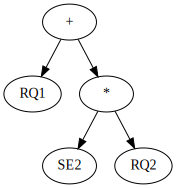

In [21]:
infix_expression = "RQ1 + SE2 * RQ2"
postfix = infix_to_postfix(infix_expression)
tree = postfix_to_binexp_tree(postfix)
graph = create_graph(tree.root, Digraph(comment='Binary Expression Tree'))
graph

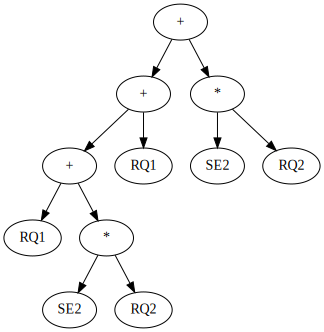

In [22]:
infix_expression = "RQ1 + SE2 * RQ2 + RQ1 + SE2 * RQ2"
postfix = infix_to_postfix(infix_expression)
tree = postfix_to_binexp_tree(postfix)
graph = create_graph(tree.root, Digraph(comment='Binary Expression Tree'))
graph

In [23]:
infix_expression = "RQ1 + SE2 * RQ2 + RQ1 + SE2 * RQ2"
postfix = infix_to_postfix(infix_expression)
postfix

'RQ1 SE2 RQ2 * + RQ1 + SE2 RQ2 * +'

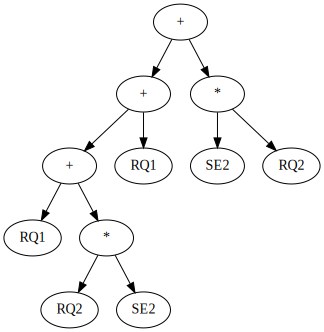

In [24]:
infix_expression = "RQ1 + RQ2 * SE2 + RQ1 + SE2 * RQ2"
postfix = infix_to_postfix(infix_expression)
tree = postfix_to_binexp_tree(postfix)
graph = create_graph(tree.root, Digraph(comment='Binary Expression Tree'))
graph

In [50]:
infix_expression = "RQ1 + RQ2 * SE2 + RQ1 + SE2 * RQ2"
postfix = infix_to_postfix(infix_expression)
tree = postfix_to_binexp_tree(postfix)
postfix_tokens = postfix.split(' ')
postfix_tokens

['RQ1', 'RQ2', 'SE2', '*', '+', 'RQ1', '+', 'SE2', 'RQ2', '*', '+']

In [58]:
def select_postorder(root, node_idx):
    ''' Select node from binary tree given postorder index
    '''
    node = root
    stack = []
    last_node_visited = None
    i = 0
    while len(stack) > 0 or node is not None:
        if node:
            stack.append(node)
            node = node.left
        else:
            peek_node = stack[-1]
            if peek_node.right is not None and last_node_visited is not peek_node.right:
                node = peek_node.right
            else:
                if i == node_idx:
                    return peek_node
                last_node_visited = stack.pop()
                i += 1
                
    return None

select_postorder(tree.root, 2).value

'SE2'

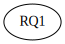

In [59]:
create_graph(select_postorder(tree.root, 0), Digraph(comment='Binary Expression Tree'))